# Analysing Daily Life Data using the GMAC algorithm

This notebook analyses the daily life data collected from 5 stroke suvivors and
healthy controls, wearing the IMU sensors for 7 days and 3 days, respectively.

The parameters for the GMAC algorithm are taken from the optimal values identified 
from the optimization procedure.

### Getting the data

If you do not already have the data to run this this notebook, you need to
download it from here.



### Standards modules

In [1]:
%reload_ext autoreload
%autoreload 2

In [32]:
import sys
import os
import scipy
import pathlib
import itertools
import glob
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import medfilt
from datetime import datetime as dt

In [3]:
import seaborn as sns

### Custom Modules

In [4]:
sys.path.append("../scripts")

from misc2 import organize_rawdata_datewise
from misc2 import read_raw_data
from misc2 import read_raw_date_data
from misc2 import interp1d_rawdata

## Custom functions

## Define notebook level constants

In [5]:
# Sampling rate for the data is 50ms
dT = 0.02
Fs = int(1 / dT)

# Raw data columns
rd_cols = rd_cols = ["ax", "ay", "az", "gx", "gy", "gz", "datetime", "yaw", "pitch"]
data_cols = [_el for _el in rd_cols if _el != "datetime"]

# Acclerometer and gyroscope scaling factors.
accl_scale = 4 / 32768.
gyro_scale = 0.0174533 / 65.536

In [63]:
subj = "C4"
arm = "left"

# Find all processed files
files = glob.glob((base_data_dir / "processed" / subj/ f"{arm}*pcrd*.csv").as_posix())

# Read and scale datya
fdata = pd.read_csv(files[1])

In [64]:
# Scale the accelerometer and the gyroscope readings
fdata[['ax', 'ay', 'az']] = fdata[['ax', 'ay', 'az']] * accl_scale
fdata[['gx', 'gy', 'gz']] = fdata[['gx', 'gy', 'gz']] * gyro_scale

# Median filter to remove outliers
for _c in ['ax', 'ay', 'az', 'gx', 'gy', 'gz']:
    fdata[f'{_c}f'] = medfilt(fdata[_c].values, kernel_size=5)

(1000.0, 1500.0)

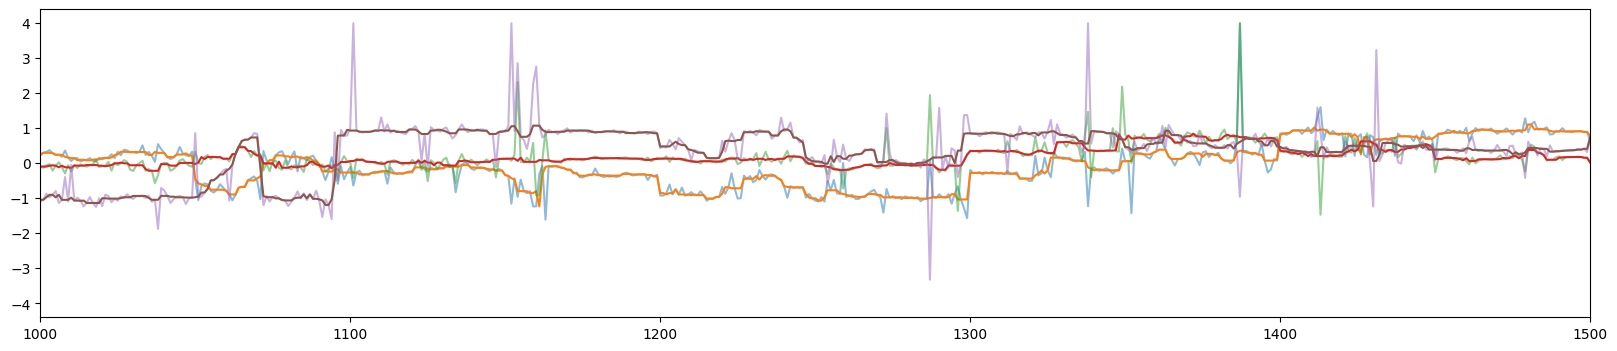

In [67]:
fig = plt.figure(figsize=(20, 4))
plt.plot(fdata['ax'], alpha=0.5)
plt.plot(fdata['axf'])
plt.plot(fdata['ay'], alpha=0.5)
plt.plot(fdata['ayf'])
plt.plot(fdata['az'], alpha=0.5)
plt.plot(fdata['azf'])
plt.xlim(1000, 1500)

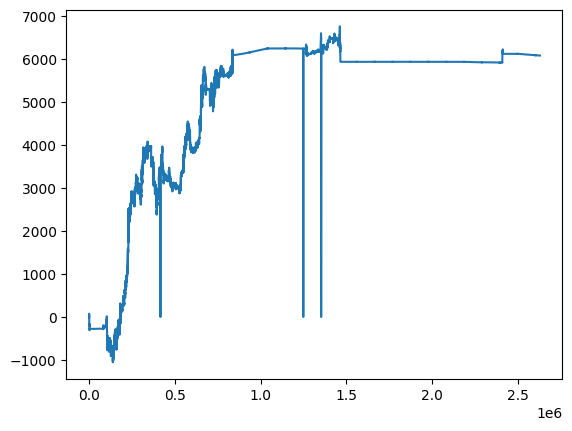

In [70]:
plt.plot(fdata['pitch'])